# โหลดข้อมูลและตรวจสอบเบื้องต้น

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = sns.load_dataset('titanic')
df.sample(5) # สุ่มเลือก5ตัวอย่าง

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
231,0,3,male,29.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True
237,1,2,female,8.0,0,2,26.2500,S,Second,child,False,NaN,Southampton,yes,False
502,0,3,female,NaN,0,0,7.6292,Q,Third,woman,False,NaN,Queenstown,no,True
283,1,3,male,19.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,yes,True
247,1,2,female,24.0,0,2,14.5000,S,Second,woman,False,NaN,Southampton,yes,False


In [57]:
df.info() # แสดงรายละเอียดข้อมูล

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [58]:
df.describe().round(2) # หาค่าสถิติเบื้องต้นทศนิยม 2 ตำแหน่ง

,survived,pclass,age,sibsp,parch,fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


# หา Missing data

In [59]:
df.isnull().sum()  # ตรวจหาข้อมูลที่สูญหาย

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [60]:
df.isnull().any() # ตรวจดูว่าcolumunใดมี missing data บ้าง ถ้ามีตอบ True ไม่มีจะตอบ False

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [61]:
# ตรวจสอบเปอร์เซ็นต์ของ Missing data
missing_count = df.isnull().sum() # จำนวนmissing data

total_cells = np.product(df.shape) # ผลคูณ ช่องข้อมูล = column * row
total_missing = missing_count.sum() # รวมจำนวนทั้งหมด
missing_percent = total_missing/total_cells *100

print('Total cells : {}'.format(total_cells))
print('Total missing values : {}'.format(total_missing))
print('Missing data overall : {}%'.format(missing_percent))

Total cells : 13365
Total missing values : 869
Missing data overall : 6.502057613168724%


# ตรวจสอบ Missing data แต่ละคอลัมน์

In [62]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

### การจัดการกับ Missing data มีหลายวิธี ในส่วนนี้ ใช้ 3 วิธี
- เติมข้อมูลด้วย ค่าเฉลี่ย หรือ ค่ากลางอื่น
- เติมข้อมูลหรือแทนที่ด้วยค่าใดค่าหนึ่ง
- ลบแถวหรือคอลัมน์นั้นทิ้งไปเลย (มีข้อเสียคือ ทำให้สูญเสียข้อมูลหายไป)

# พิจารณาการจัดการ Missing Data 

- จัดการ column โดยพิจารณาจาก missing values Ratio 

In [63]:
# ตรวจสอบเปอร์เซ็นต์ของ Missing data
# Embarked
missing_count = df.embarked.isnull().sum() # จำนวนmissing data

total_cells = np.product(df.embarked.shape) # ผลคูณ ช่องข้อมูล = column * row
total_missing = missing_count.sum() # รวมจำนวนทั้งหมด
missing_percent = total_missing/total_cells *100

print('Total cells : {}'.format(total_cells))
print('Total missing values : {}'.format(total_missing))
print('Missing data overall : {}%'.format(missing_percent))

Total cells : 891
Total missing values : 2
Missing data overall : 0.22446689113355783%


In [64]:
# embark_town
missing_count = df.embark_town.isnull().sum() # จำนวนmissing data

total_cells = np.product(df.embark_town.shape) # ผลคูณ ช่องข้อมูล = column * row
total_missing = missing_count.sum() # รวมจำนวนทั้งหมด
missing_percent = total_missing/total_cells *100
missing_percent = total_missing/total_cells *100
print('Embark_town')
print('Total cells : {}'.format(total_cells))
print('Total missing values : {}'.format(total_missing))
print('Missing data overall : {}%'.format(missing_percent))

Embark_town
Total cells : 891
Total missing values : 2
Missing data overall : 0.22446689113355783%


In [65]:
df.embarked[df.embarked.isnull()] #หาข้อมูลที่เป็น missing data คอลัมน์ embarked

61     NaN
829    NaN
Name: embarked, dtype: object

In [66]:
df.embark_town[df.embark_town.isnull()] #หาข้อมูลที่เป็น missing data คอลัมน์ embark_town

61     NaN
829    NaN
Name: embark_town, dtype: object

In [67]:
# คิดเป็น 0.22 % ตัดข้อมูลrow นี้ได้เกิด missing data ตำแหน่งเดียวกันด้วย
cols = ['embarked', 'embark_town']
df.dropna(subset=cols, inplace=True) # จัดการเฉพาะ Temp , Humid
df.isnull().any() 

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked       False
class          False
who            False
adult_male     False
deck            True
embark_town    False
alive          False
alone          False
dtype: bool

In [68]:
# deck
missing_count = df.deck.isnull().sum() # จำนวนmissing data

total_cells = np.product(df.deck.shape) # ผลคูณ ช่องข้อมูล = column * row
total_missing = missing_count.sum() # รวมจำนวนทั้งหมด
missing_percent = total_missing/total_cells *100
print('Deck')
print('Total cells : {}'.format(total_cells))
print('Total missing values : {}'.format(total_missing))
print('Missing data overall : {}%'.format(missing_percent))

Deck
Total cells : 889
Total missing values : 688
Missing data overall : 77.39032620922384%


In [69]:
cols = ['deck']
df.drop(cols, axis='columns', inplace=True) # ลบคอลัมน์  deck ไป เพราะมีmissingdata เยอะเกินไป
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,Queenstown,no,True


- แทนที่ Missing data (age) ด้วยค่ากลาง

In [70]:
df.describe().round(2)

,survived,pclass,age,sibsp,parch,fare
count,889.00,889.00,712.00,889.00,889.00,889.00
mean,0.38,2.31,29.64,0.52,0.38,32.10
std,0.49,0.83,14.49,1.10,0.81,49.70
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.00,0.00,0.00,7.90
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


In [71]:
# เนื่องจาก อายุมี 'child' ณ column 'who' ด้วยการเติม median or mean ไปตรงๆ ไม่สมเหตุสมผล
df.who.unique()

array(['man', 'woman', 'child'], dtype=object)

In [72]:
# ควรเติมอายุเด็ก แยกจาก man and woman ตรวจสอบ % เด็กๆ
who_child = df.who[df.who=='child'].count()
print('who child = {} คน'.format(who_child))
print('{:.2f} %'.format(who_child /df.shape[0]*100))

who child = 83 คน
9.34 %


In [73]:
df_child = df[df.who == 'child'] # แยกเด็กออกมาหาค่ากลาง

In [74]:
df_child.describe().round(2)

,survived,pclass,age,sibsp,parch,fare
count,83.00,83.00,83.00,83.00,83.00,83.00
mean,0.59,2.63,6.37,1.73,1.27,32.79
std,0.49,0.62,4.73,1.64,0.68,33.47
min,0.00,1.00,0.42,0.00,0.00,7.22
25%,0.00,2.00,2.00,0.00,1.00,15.90
50%,1.00,3.00,5.00,1.00,1.00,26.25
75%,1.00,3.00,9.50,3.00,2.00,32.19
max,1.00,3.00,15.00,5.00,2.00,211.34


In [75]:
df_child.age.median() # ตรวจค่า median age
df_child.age.mean() # ตรวจค่า mean age

6.369518072289157

In [76]:
# เปลี่ยนข้อมูล woman and man เป็น adult
to_change = ['man', 'woman']
df.who.replace(to_change, 'adult', inplace=True)

In [77]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,adult,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,adult,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,adult,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,adult,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,adult,True,Southampton,no,True


In [78]:
# ดังนั้น column adult_male จึงไม่จำเป็น
df.drop('adult_male', axis='columns', inplace=True)

In [79]:
df.sample(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,embark_town,alive,alone
228,0,2,male,18.00,0,0,13.0000,S,Second,adult,Southampton,no,True
246,0,3,female,25.00,0,0,7.7750,S,Third,adult,Southampton,no,True
610,0,3,female,39.00,1,5,31.2750,S,Third,adult,Southampton,no,False
164,0,3,male,1.00,4,1,39.6875,S,Third,child,Southampton,no,False
305,1,1,male,0.92,1,2,151.5500,S,First,child,Southampton,yes,False
58,1,2,female,5.00,1,2,27.7500,S,Second,child,Southampton,yes,False
15,1,2,female,55.00,0,0,16.0000,S,Second,adult,Southampton,yes,True
660,1,1,male,50.00,2,0,133.6500,S,First,adult,Southampton,yes,False
797,1,3,female,31.00,0,0,8.6833,S,Third,adult,Southampton,yes,True
583,0,1,male,36.00,0,0,40.1250,C,First,adult,Cherbourg,no,True


In [80]:
df_adult = df[df.who == 'adult'] # ผู้ใหญ่ออกมาหาค่ากลาง
df_adult.age.mean() # ตรวจค่า mean age adult

32.713036565977745

In [81]:
# เลือกใช้ค่า df_child.age.mean() แทน missing value ใน child
# เลือกใช้ค่า df_adult.age.mean() แทน missing value ใน adult
colm = 'age'# เลือกคอลัมน์ที่จะสนใจแทนที่ข้อมูล
if np.where(df['who']=='child'):
    df[colm] = df[colm].fillna(df_child.age.mean())
elif np.where(df['who']=='adult'):
     df[colm] = df[colm].fillna(df_adult.age.mean())
        
#df.head()
#df.describe().round(2)

In [82]:
# ตรวจดูยังมี na อยู่หรือไม่
df.isnull().any()

survived       False
pclass         False
sex            False
age            False
sibsp          False
parch          False
fare           False
embarked       False
class          False
who            False
embark_town    False
alive          False
alone          False
dtype: bool

In [83]:
# ตรวจสอบว่าเปลี่ยนสำเร็จไหม
df_child = df[df.who == 'child'] #
df_adult = df[df.who == 'adult'] # ผู้ใหญ่ออกมาหาค่ากลาง
print('mean age of adult :',df_adult.age.mean()) # ตรวจค่า mean age adult ต้องเท่ากับ 32.76782884310618 ไม่เท่าเดิมเพราะมี missiong values
print('mean age of child :',df_child.age.mean()) # ตรวจค่า mean age adult ต้องเท่ากับ 6.369518072289157 เท่าเดิมเพราะ ไม่มี missiong values 

mean age of adult : 26.92792146252512
mean age of child : 6.369518072289157


In [84]:
#กำจัด missing data สำเร็จ !!

# Data Cleansing 

- จัดการกับข้อมูลที่ซ้ำเกินความจำเป็น

In [85]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
embark_town      object
alive            object
alone              bool
dtype: object

In [86]:
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,embark_town,alive,alone
861,0,2,male,21.000000,1,0,11.500,S,Second,adult,Southampton,no,False
795,0,2,male,39.000000,0,0,13.000,S,Second,adult,Southampton,no,True
593,0,3,female,6.369518,0,2,7.750,Q,Third,adult,Queenstown,no,False
232,0,2,male,59.000000,0,0,13.500,S,Second,adult,Southampton,no,True
567,0,3,female,29.000000,0,4,21.075,S,Third,adult,Southampton,no,False


In [87]:
# กำจัด column ที่ซ้ำ คือ class
col = ['class', 'alive']
df.drop(col, axis='columns', inplace=True) 

# Preprocessing

In [88]:
#ทำ labelencoding สำหรับ X
from sklearn.preprocessing import LabelEncoder

def labelEncode(data, columns):
    for i in columns:
#         print(i)
        lb = LabelEncoder().fit_transform(data[i])
        data[i + '_'] = lb
        
columns =  ['pclass', 'sex', 'who', 'alone']
labelEncode(df, columns)

In [89]:
# ทำ label encoding สำหรับ Output
y_le = LabelEncoder()
y = y_le.fit_transform(df.survived)
df['survived_'] = y
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,embark_town,alone,pclass_,sex_,who_,alone_,survived_
0,0,3,male,22.000000,1,0,7.2500,S,adult,Southampton,False,2,1,0,0,0
1,1,1,female,38.000000,1,0,71.2833,C,adult,Cherbourg,False,0,0,0,0,1
2,1,3,female,26.000000,0,0,7.9250,S,adult,Southampton,True,2,0,0,1,1
3,1,1,female,35.000000,1,0,53.1000,S,adult,Southampton,False,0,0,0,0,1
4,0,3,male,35.000000,0,0,8.0500,S,adult,Southampton,True,2,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,adult,Southampton,True,1,1,0,1,0
887,1,1,female,19.000000,0,0,30.0000,S,adult,Southampton,True,0,0,0,1,1
888,0,3,female,6.369518,1,2,23.4500,S,adult,Southampton,False,2,0,0,0,0
889,1,1,male,26.000000,0,0,30.0000,C,adult,Cherbourg,True,0,1,0,1,1


- เลือก Features ที่จะนำมา train โดยคัดกรองตัวแปร Low Variance

In [90]:
X_pp = df[['age', 'who_', 'sex_', 'sibsp', 'parch', 'alone_', 'fare', 'pclass_']]

In [91]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler as Scaler # Normalization 0-1 เพราะ Variance มีค่าต่างกันแต่ละตัวแปร
X = X_pp 
sc = Scaler()
X_sc = sc.fit_transform(X) # Normalization 0-1

df_sc = pd.DataFrame(X_sc, columns=X.columns) # เก็บ ที่ทำtransform แล้วลงในตัวแปร df_sc
df_sc.head().round(3)

,age,who_,sex_,sibsp,parch,alone_,fare,pclass_
0,0.271,0.0,1.0,0.125,0.0,0.0,0.014,1.0
1,0.472,0.0,0.0,0.125,0.0,0.0,0.139,0.0
2,0.321,0.0,0.0,0.000,0.0,1.0,0.015,1.0
3,0.435,0.0,0.0,0.125,0.0,0.0,0.104,0.0
4,0.435,0.0,1.0,0.000,0.0,1.0,0.016,1.0


- เลือก Feature ด้วย  Univariate Selction (category)

In [92]:
# ทำการ import ไลบรารี่และ fit ข้อมูลเพื่อเลือก features ที่ดีที่สุด
from sklearn.feature_selection import SelectKBest, chi2
test = SelectKBest(score_func = chi2, k=5) # กำหนดค่า k (จำนวนคอลัมน์ที่ต้องการ)
fit = test.fit(X_sc, y)

np.set_printoptions(precision = 3)
print(fit.scores_) # แสดง scores
features = fit.transform(X_sc)

[6.584e-03 1.519e+01 9.151e+01 2.989e-01 1.741e+00 1.505e+01 8.692e+00
 2.656e+01]


In [93]:
#จะได้ค่า Score ของแต่ละคอลัมน์และแสดงตัวอย่างข้อมูลที่ควรนำไปใช้
# หากต้องการเทียบข้อมูลให้ใช้
dfts = pd.DataFrame(fit.scores_, columns=['score'])
dfts['column'] = X.columns
dfts.sort_values(by= 'score', ascending=False)
df_sc = pd.DataFrame(X_sc, columns=X.columns) # เตรียม df_sc ไว้

In [94]:
# ควรตัด age, parch ออกไปถ้าต้องการลดให้เหลือ 5 column
cols_fts = dfts.sort_values(by='score', ascending=False).head(5).column # เรียงลำดับ 5 อันดับคะแนนสูงสุด
#cols_fts = dfts.nlargest(5, 'score').column # หรือใช้ nlargest
X_US_fts = df_sc[cols_fts].copy()
X_US_fts.shape #จะเหลือ 5 คอลัมน์
X_US_fts.sample(5) # จะได้ features ที่ใช้มี sex_,	pclass_, who_, alone_, fare

,sex_,pclass_,who_,alone_,fare
754,1.0,0.5,1.0,0.0,0.028302
502,0.0,1.0,0.0,1.0,0.018714
156,1.0,1.0,0.0,1.0,0.015713
369,1.0,0.0,0.0,0.0,0.108215
340,0.0,0.0,0.0,0.0,0.513342


- การเลือกด้วยวิธีเวียนกำจัด RFE (Recursive Feature Elimination) 

เป็นเทคนิค Feature Selection ที่วนรอบการกำจัดเอา Feature ออกไป มีหลักการคือต้องการสร้าง Model classifier ตัวฐานก่อน จากนั้นทำการประเมิณ Features แล้วรายงานผลว่า Feature ตัวใดควรเอาไว้ ควรตัดทิ้ง

In [95]:
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC

model = LinearSVC() # สร้าง model classifier เพื่อประเมิณ feature ย่อยๆ
rfe = RFE(model, 5) # สร้าง RFE model และ เลือก 5 Features
rfe = rfe.fit(X_sc,y)

print(rfe.support_) # แสดงผลการประเมิณการเลือก Features
print(rfe.ranking_)

[False  True  True  True False False  True  True]
[3 1 1 1 2 4 1 1]


In [96]:
# 1(True) ควรเลือก Feature นั้นไว้
# ให้อ่าน features ที่เราควรเลือกไว้ใช่้
cols_fts = []
for i,cl in enumerate(X.columns):
    if rfe.support_[i] == True:
        cols_fts.append(cl)
cols_fts # แนะนำให้เลือก features เหล่านี้ไปใช้

['who_', 'sex_', 'sibsp', 'fare', 'pclass_']

In [97]:
# เลือกใช้งาน cols_fts
X_RFS_fts = df_sc[cols_fts]
X_RFS_fts.head()

,who_,sex_,sibsp,fare,pclass_
0,0.0,1.0,0.125,0.014151,1.0
1,0.0,0.0,0.125,0.139136,0.0
2,0.0,0.0,0.000,0.015469,1.0
3,0.0,0.0,0.125,0.103644,0.0
4,0.0,1.0,0.000,0.015713,1.0


In [98]:
X_US_fts.sample(5)

,sex_,pclass_,who_,alone_,fare
330,1.0,0.0,0.0,1.0,0.055628
645,1.0,1.0,0.0,1.0,0.015412
107,1.0,1.0,0.0,1.0,0.015412
647,1.0,1.0,0.0,1.0,0.014737
25,0.0,1.0,0.0,0.0,0.061264


In [99]:
# ลดสเกลของ X_US_fts /X_RFS_fts ด้วย Standard Scale
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() # สร้าง Obj สำหรับทำ Standard Scale
X = X_RFS_fts
X_SDS = sc.fit_transform(X) # X_sc คือข้อมูลที่ทำการปรับสเกลแล้ว จะจัดอยู่ในรูป Matrix 

# นำ Matrix ไปสร้างเป็น Data Frame ด้วย Pandas
cols = ['SEX', 'PC', 'W', 'AL', 'F']
sc_df = pd.DataFrame(X_SDS, columns=cols)
sc_df.head() # ดูข้อมูลที่ลดสเกลแล้ว


,SEX,PC,W,AL,F
0,-0.320901,0.735342,0.431350,-0.500240,0.825209
1,-0.320901,-1.359911,0.431350,0.788947,-1.572211
2,-0.320901,-1.359911,-0.475199,-0.486650,0.825209
3,-0.320901,-1.359911,0.431350,0.422861,-1.572211
4,-0.320901,0.735342,-0.475199,-0.484133,0.825209


In [100]:
# แบ่งข้อมูล Train Test
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X_SDS,y,test_size=0.2) # แบ่งเป็น X y test train จาก X y โดยที่ test_size = 0.2 (train_size=0.8)

# สร้าง Model Decision Tree Classifier

In [101]:
# train model DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier()

In [102]:
model_DT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# สร้าง Tree Diagram จาก model

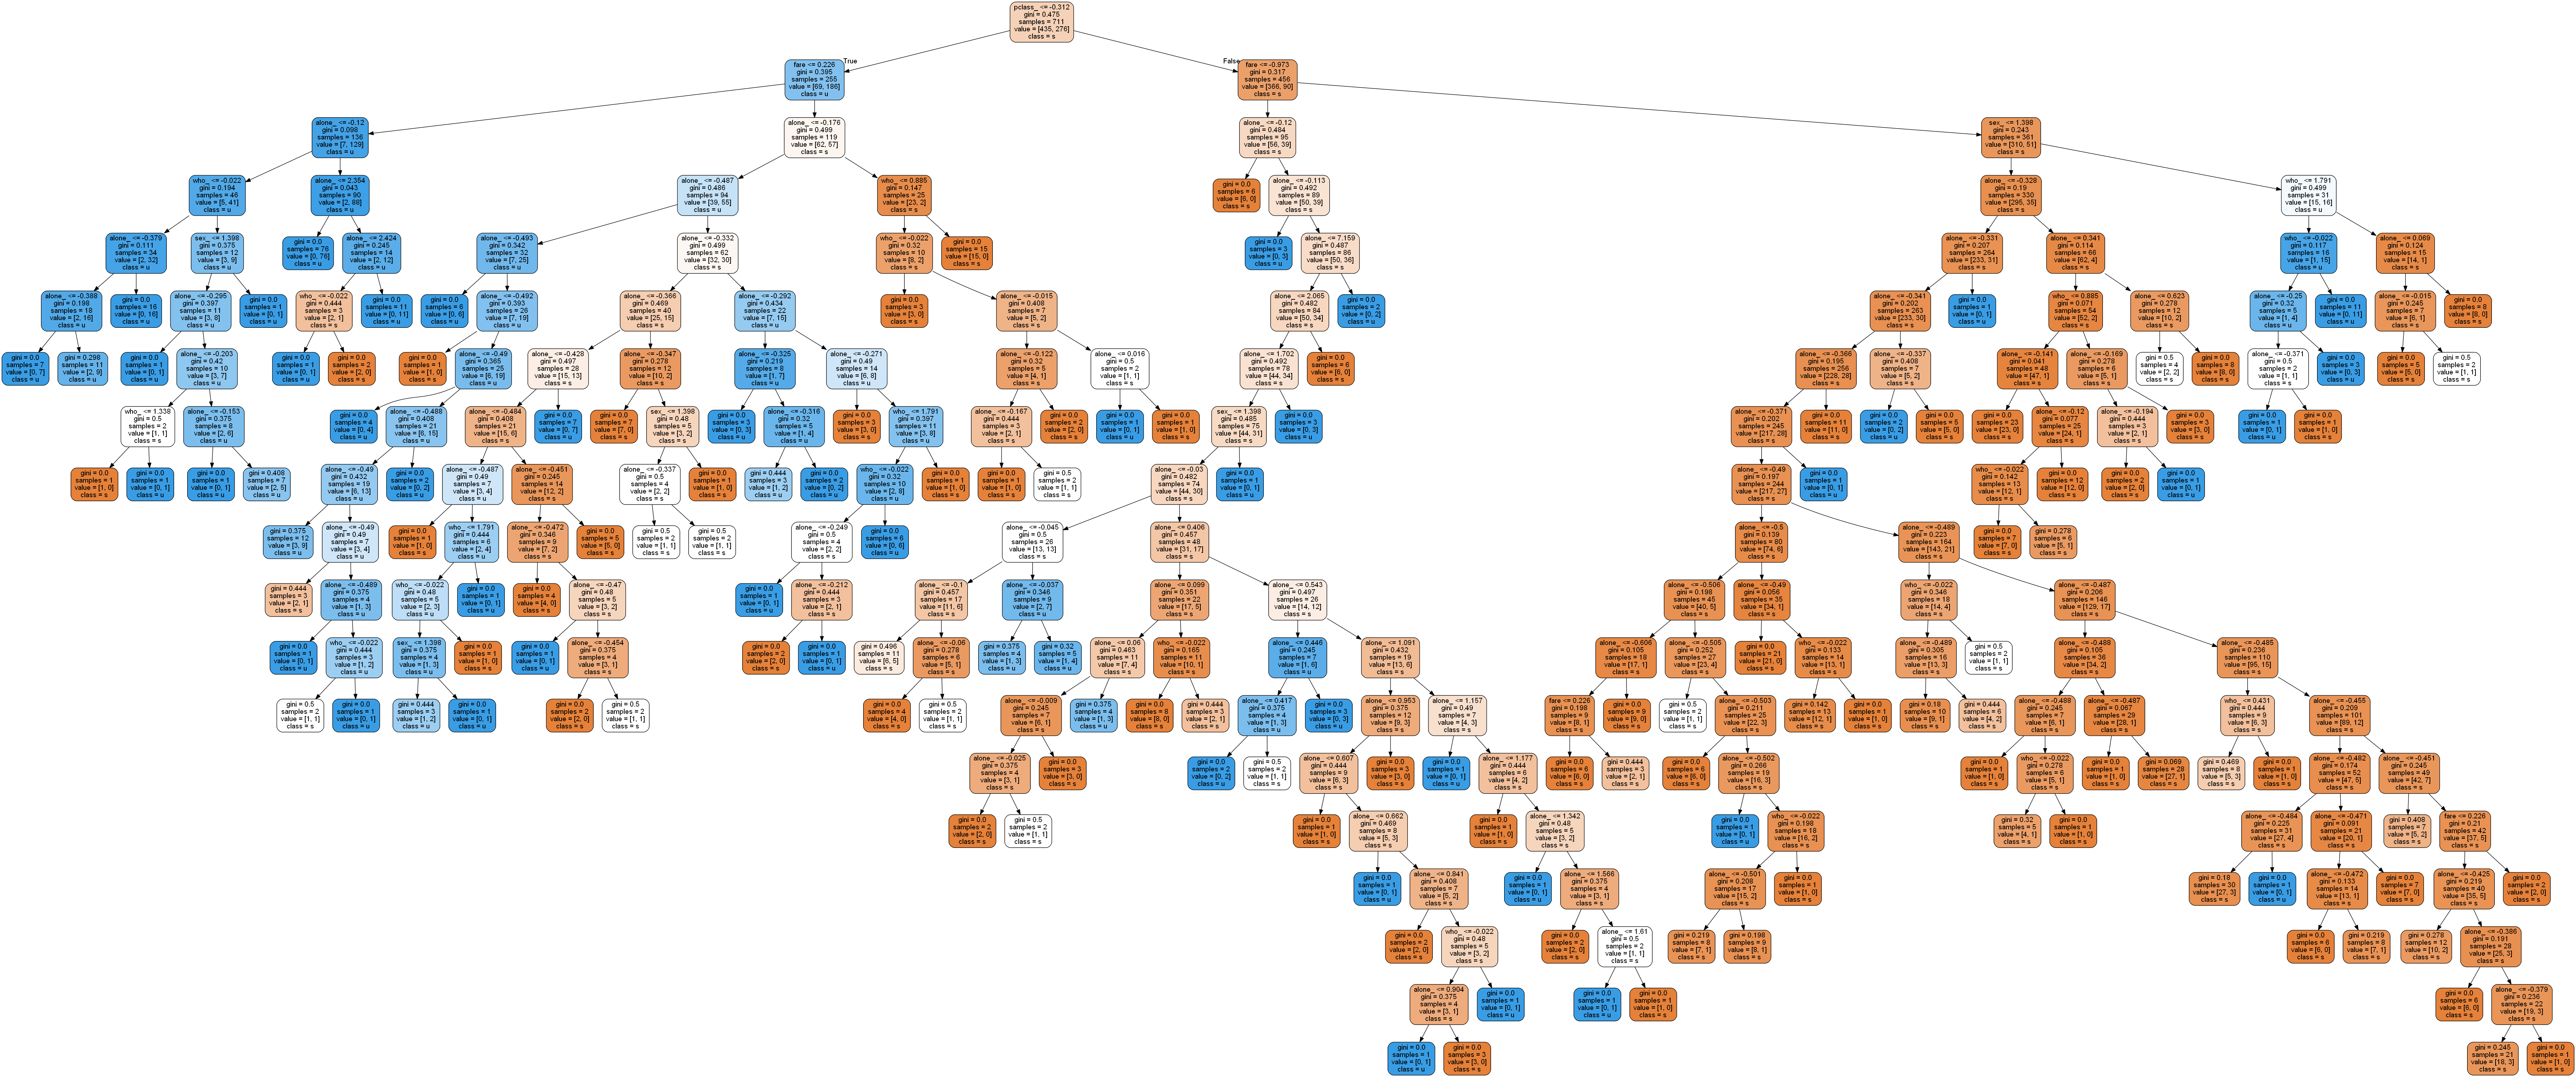

In [103]:
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image

data_feature_names =  'sex_', 'pclass_', 'who_', 'alone_', 'fare' # ชื่อ features ที่จะปรากฎในแต่ละช่องของไดอะแกรม
survived = 'survived_' # ชื่อ class ที่จะคัดแยก 0 = unsurvived_/ 1 = survived

# สร้างข้อมูล dot_data จากตัวแปร model (ข้อมูลนี้จะนำไปplot graph)
dot_data = export_graphviz(model_DT, out_file=None,
                          feature_names=data_feature_names,
                          class_names= survived,
                          filled=True, 
                          rounded=True)
# สร้างไดอะแกรม จากข้อมูล dot_data
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree-titanic.png') # save diagram file 
Image(graph.create_png()) # display diagram

# การประเมิน Model

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#ตรวจสอบจำนวนข้อมูลที่ Train, Test และดูข้อมูลที่ใช้ Test (จะเกิดการสุ่ม)
print('Total X: {}'.format(len(X)))
print('Total train: {}'.format(len(X_train)))
print('Total test: {}'.format(len(X_test)))
X_test
# ทำการ Test
y_predict = model_DT.predict(X_test)
y_pred = y_predict # กำหนดให้ yที่ทำนายได้ คือ y_pred
y_true = y_test # กำหนดให้ yที่ทดสอบ คือ y_true
#แยก ทำ target
class_names = ['unsurvived', 'survived']
# คำนวณรายงาน และ Confusion Matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


print('Score : {:.3f}'.format(model_DT.score(X_test,y_test)))
print('Accuracy Score:',accuracy_score(y_test, y_pred).round(3))
# class_names no,yes จากก่อนหน้านี้
print(classification_report(y_true, y_pred, target_names=class_names))
cm = confusion_matrix(y_test, y_pred)
print(cm)
y_test

Total X: 889
Total train: 711
Total test: 178
Score : 0.815
Accuracy Score: 0.815
              precision    recall  f1-score   support

  unsurvived       0.82      0.91      0.86       114
    survived       0.80      0.64      0.71        64

    accuracy                           0.81       178
   macro avg       0.81      0.78      0.79       178
weighted avg       0.81      0.81      0.81       178

[[104  10]
 [ 23  41]]


array([0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0], dtype=int64)

In [105]:
# cross validation
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(model_DT, X, y, cv=5)
# ค่า confusion matrix ต่างๆคือ
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
TN, FP, FN, TP

precision_p = TP/(TP+FP)
precision_n = TN/(TN+FN)
recall_p = TP/(TP+FN)
recall_n = TN/(TN+FP)
accuracy = (TP+TN)/(TP+TN+FP+FN)
print('Accuracy:', (accuracy*100).round(2),'%')
print('Precision (Positive or survived):', precision_p.round(2))
print('Precision (Negative or unsurvived):',precision_n.round(2))
print('Recall (Positive or survived):', recall_p.round(2))
print('Recall (Negative or unsurvived):', recall_n.round(2))
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f}%'.format(cvs.mean()*100))  #ใช้เทียบกับ model อื่นๆ

Accuracy: 81.46 %
Precision (Positive or survived): 0.8
Precision (Negative or unsurvived): 0.82
Recall (Positive or survived): 0.64
Recall (Negative or unsurvived): 0.91
Cross val scores [0.775 0.792 0.832 0.843 0.814]
mean 81.1026%


# Confusion Matrix 1 Label

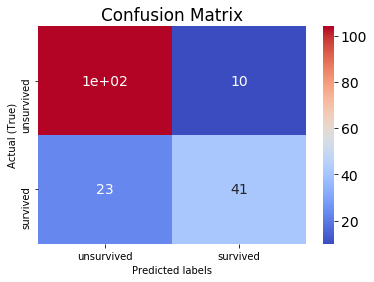

In [106]:
# ใช้ Seaborn Heat Map
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplot()
plt.rcParams['figure.figsize'] = 5,4  # ขนาด
plt.rcParams.update({'font.size':14})  # ความสูงอักษร

cm = confusion_matrix(y_true, y_pred) # คำนวณค่า Confusion Matrix
# กราฟ heatmap เฉดสีออกโทน ฟ้า แดง
sns.heatmap(cm, annot=True, ax=ax, cmap="coolwarm")

y_targets = ['unsurvived', 'survived'] # Label กำกับ ถ้าไม่มีกำหนด จะแสดง 0 1

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual (True)');
ax.set_title('Confusion Matrix'); # title
ax.xaxis.set_ticklabels(y_targets) # label กำกับแกน x
ax.yaxis.set_ticklabels(y_targets) # label กำกับแกน y
plt.show() 

#ใช้ scikitplot สร้าง 
#import scikitplot as skplot
#skplot.metrics.plot_confusion_matrix(y_true, y_pred, normalize=False)
#plt.show()

# เปรียบเทียบ model และ features แต่ละแบบ
- การเลือกด้วยวิธีเวียนกำจัด RFE (Recursive Feature Elimination)

In [107]:
# ลดสเกลของ X_US_fts /X_RFS_fts ด้วย Standard Scale
from sklearn.preprocessing import StandardScaler
import time # เพื่อจับเวลา
sc = StandardScaler() # สร้าง Obj สำหรับทำ Standard Scale
X = X_RFS_fts # 'who_', 'sex_', 'sibsp', 'fare', 'pclass_'
X_SDS = sc.fit_transform(X) # X_sc คือข้อมูลที่ทำการปรับสเกลแล้ว จะจัดอยู่ในรูป Matrix 

In [108]:
# นำ Matrix ไปสร้างเป็น Data Frame ด้วย Pandas
cols = ['SEX', 'PC', 'W', 'AL', 'F']
sc_df = pd.DataFrame(X_SDS, columns=cols)
sc_df.head() # ดูข้อมูลที่ลดสเกลแล้ว

,SEX,PC,W,AL,F
0,-0.320901,0.735342,0.431350,-0.500240,0.825209
1,-0.320901,-1.359911,0.431350,0.788947,-1.572211
2,-0.320901,-1.359911,-0.475199,-0.486650,0.825209
3,-0.320901,-1.359911,0.431350,0.422861,-1.572211
4,-0.320901,0.735342,-0.475199,-0.484133,0.825209


In [109]:
# แบ่งข้อมูล Train Test
from sklearn.model_selection import train_test_split
# แบ่งเป็น X y test train จาก X y โดยที่ test_size = 0.2 (train_size=0.8)
X_train, X_test,y_train,y_test = train_test_split(X_SDS,y,test_size=0.2,random_state=2020) 

## 1. สำหรับ Decision Tree

- การเลือกด้วยวิธีเวียนกำจัด RFE (Recursive Feature Elimination) 

In [110]:
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier()
start = time() # เวลาเริ่มต้น train
model_DT.fit(X_train, y_train)
finish_RFE_DT = time() -start
print('{:.5f} sec'.format(finish_US_DT)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_DT, X, y, cv=5) # k=5
cvs_RFE_DT = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f} %'.format(cvs.mean()*100))

TypeError: 'module' object is not callable

## 2. สำหรับ Support Vector Machine

- การเลือกด้วยวิธีเวียนกำจัด RFE (Recursive Feature Elimination) 

In [ ]:
from sklearn.svm import SVC
model_SVC = SVC()
start = time() # เวลาเริ่มต้น train
model_SVC.fit(X_train, y_train)
finish_RFE_SVC = time() -start
print('{:.5f} sec'.format(finish_RFE_SVC)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_SVC, X, y, cv=5) # k=5
cvs_RFE_SVC = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f} %'.format(cvs.mean()*100))

## 3. สำหรับ Naive Bayes

- การเลือกด้วยวิธีเวียนกำจัด RFE (Recursive Feature Elimination)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
model_NB = GaussianNB() # Naive Bayes
start = time() # เวลาเริ่มต้น train
model_NB.fit(X_train, y_train) # Train สร้าง model
finish_RFE_NB = time() -start
print('{:.5f} sec'.format(finish_RFE_NB)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_NB, X, y, cv=5) # precision
cvs_RFE_NB = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4))) 
print('mean {:.4f} %'.format(cvs.mean()*100)) 

## 4. สำหรับ k-Nearest Neighbors

- การเลือกด้วยวิธีเวียนกำจัด RFE (Recursive Feature Elimination)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier() #ตั้งค่า model n_neighbors = 1,2,3
start = time() # เวลาเริ่มต้น train
model_KNN.fit(X_train, y_train) # Train สร้าง model
finish_RFE_kNN = time() -start
print('{:.5f} sec'.format(finish_RFE_kNN)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_KNN, X, y, cv=5) # k=5
cvs_RFE_kNN = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f} %'.format(cvs.mean()*100))

## 5. สำหรับ Random Forest

- การเลือกด้วยวิธีเวียนกำจัด RFE (Recursive Feature Elimination)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_RFC = RandomForestClassifier() # n_estimators = จำนวนต้นไม้ที่ต้องการสร้าง
start = time() # เวลาเริ่มต้น train
model_RFC.fit(X_train, y_train) # Train สร้าง model
finish_RFE_RF = time() -start
print('{:.5f} sec'.format(finish_RFE_RF)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_RFC, X, y, cv=5) # k=5
cvs_RFE_RF = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f} %'.format(cvs.mean()*100))

## 6. สำหรับ Logistic Regression

- การเลือกด้วยวิธีเวียนกำจัด RFE (Recursive Feature Elimination)

In [ ]:
model_LR = LogisticRegression() # n_estimators = จำนวนต้นไม้ที่ต้องการสร้าง
start = time() # เวลาเริ่มต้น train
model_LR.fit(X_train, y_train) # Train สร้าง model
finish_RFE_LR = time() -start
print('{:.5f} sec'.format(finish_RFE_LR)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_LR, X, y, cv=5) # k=5
cvs_RFE_LR = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f} %'.format(cvs.mean()*100))

# เปรียบเทียบ model และ features แต่ละแบบ
- การเลือกFeatures ด้วยวิธี  Univariate Selection (category)

In [ ]:
# ลดสเกลของ X_US_fts /X_RFS_fts ด้วย Standard Scale
from sklearn.preprocessing import StandardScaler
from time import time
sc = StandardScaler() # สร้าง Obj สำหรับทำ Standard Scale
X = X_US_fts # 'sex_', 'pclass_', 'who_', 'alone_', 'fare'
X_SDS = sc.fit_transform(X) # X_sc คือข้อมูลที่ทำการปรับสเกลแล้ว จะจัดอยู่ในรูป Matrix 

In [ ]:
# นำ Matrix ไปสร้างเป็น Data Frame ด้วย Pandas
cols = ['SEX', 'PC', 'W', 'AL', 'F']
sc_df = pd.DataFrame(X_SDS, columns=cols)
sc_df.head() # ดูข้อมูลที่ลดสเกลแล้ว

In [ ]:
# แบ่งข้อมูล Train Test
from sklearn.model_selection import train_test_split
# แบ่งเป็น X y test train จาก X y โดยที่ test_size = 0.2 (train_size=0.8)
X_train, X_test,y_train,y_test = train_test_split(X_SDS,y,test_size=0.2,random_state=2020) 

## 1. สำหรับ Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier()
start = time() # เวลาเริ่มต้น train
model_DT.fit(X_train, y_train)
finish_US_DT = time() -start
print('{:.5f} sec'.format(finish_US_DT)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_DT, X, y, cv=5) # k=5
cvs_US_DT = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f} %'.format(cvs.mean()*100))

## 2. สำหรับ Support Vector Machine

In [ ]:
from sklearn.svm import SVC
model_SVC = SVC()
start = time() # เวลาเริ่มต้น train
model_SVC.fit(X_train, y_train)
finish_US_SVC = time() -start
print('{:.5f} sec'.format(finish_US_SVC)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_SVC, X, y, cv=5) # k=5
cvs_US_SVC = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f} %'.format(cvs.mean()*100))

## 3. สำหรับ Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
model_NB = GaussianNB() # Naive Bayes
start = time() # เวลาเริ่มต้น train
model_NB.fit(X_train, y_train) # Train สร้าง model
finish_US_NB = time() -start
print('{:.5f} sec'.format(finish_US_NB)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_NB, X, y, cv=5) # precision
cvs_US_NB = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4))) 
print('mean {:.4f} %'.format(cvs.mean()*100)) 

## 4. สำหรับ k-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier() #ตั้งค่า model n_neighbors = 1,2,3
start = time() # เวลาเริ่มต้น train
model_KNN.fit(X_train, y_train) # Train สร้าง model
finish_US_kNN = time() -start
print('{:.5f} sec'.format(finish_US_kNN)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_KNN, X, y, cv=5) # k=5
cvs_US_kNN = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f} %'.format(cvs.mean()*100))

## 5. สำหรับ  Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_RFC = RandomForestClassifier() # n_estimators = จำนวนต้นไม้ที่ต้องการสร้าง
start = time() # เวลาเริ่มต้น train
model_RFC.fit(X_train, y_train) # Train สร้าง model
finish_US_RF = time() -start
print('{:.5f} sec'.format(finish_US_RFC)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_RFC, X, y, cv=5) # k=5
cvs_US_RF = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f} %'.format(cvs.mean()*100))

## 6. สำหรับ Logistic Regression

In [ ]:
model_LR = LogisticRegression() # n_estimators = จำนวนต้นไม้ที่ต้องการสร้าง
start = time() # เวลาเริ่มต้น train
model_LR.fit(X_train, y_train) # Train สร้าง model
finish_US_LR = time() -start
print('{:.5f} sec'.format(finish_US_LR)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_LR, X, y, cv=5) # k=5
cvs_US_LR = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f} %'.format(cvs.mean()*100))

In [ ]:
# สร้างตารางสรุปคะแนนเพื่อเลือก model และ Feature selection
Feature_selection_types = ['Univariate_Selection', 'Univariate_Selection','Univariate_Selection','Univariate_Selection','Univariate_Selection','Univariate_Selection',
                           'Recursive_Feature_Elimination', 'Recursive_Feature_Elimination', 'Recursive_Feature_Elimination', 'Recursive_Feature_Elimination', 'Recursive_Feature_Elimination', 'Recursive_Feature_Elimination'
                          ]
cross_val_score = [
                    cvs_RFE_DT, cvs_RFE_SVC, cvs_RFE_NB, cvs_RFE_kNN, cvs_RFE_RF, cvs_RFE_LR,
                    cvs_US_DT, cvs_US_SVC, cvs_US_NB, cvs_US_kNN, cvs_US_RF, cvs_US_LR
                  ]
time_score = [
                finish_RFE_DT, finish_RFE_SVC, finish_RFE_NB, finish_RFE_kNN, finish_RFE_RF, finish_RFE_LR,
                finish_US_DT, finish_US_SVC, finish_US_NB, finish_US_kNN, finish_US_RF, finish_US_LR
             ]
algorithm_types = ['Decision Tree', 'Support Vector Machine', 'Naive Bayes', 'k-Nearest Neighbors',
                   'Random Forest', 'Logistic Regression',
                  'Decision Tree', 'Support Vector Machine', 'Naive Bayes', 'k-Nearest Neighbors',
                   'Random Forest', 'Logistic Regression']
col_names = ['Algorithm', 'Feature selection', 'Cross validation score', 'Times']

In [ ]:
import pandas as pd
algorithm_types_series = pd.Series(algorithm_types)
Feature_selection_types_series = pd.Series(Feature_selection_types)
cross_val_score_series = pd.Series(cross_val_score)
time_score_series = pd.Series(time_score)
datas = zip(algorithm_types_series, Feature_selection_types_series, cross_val_score_series, time_score_series)
df = pd.DataFrame(datas , columns = col_names)

In [ ]:
df